In [1]:
%reset -f

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

import pynumdiff
simulate = pynumdiff.utils.simulate
evaluate = pynumdiff.utils.evaluate

plt.rcParams['font.serif'] = ['Times'] + plt.rcParams['font.serif']
plt.rcParams['text.usetex'] = False
plt.rcParams["ps.usedistiller"] = 'xpdf'
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.weight'] = 'normal'

%matplotlib inline

# from plot_utility import mathify_ticklabels

C:\Users\bcellini\Anaconda3\envs\wind-sense\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [11]:
np.random.seed(seed=1)

T = 2
fs = 100;
dt = 1 / fs
n_point = T*fs
A = 1
t = np.linspace(start=0, stop=T, num=n_point, endpoint=True, retstep=[], dtype=None, axis=0)
x_truth = A*np.sin(2*np.pi*t) + t
dxdt_truth = 2*np.pi*A*np.cos(2*np.pi*t) + 1
noise = np.random.normal(loc=0.0, scale=0.1*A, size=len(x_truth))
x = x_truth + noise

RMS error in velocity:  0.19011388318380673


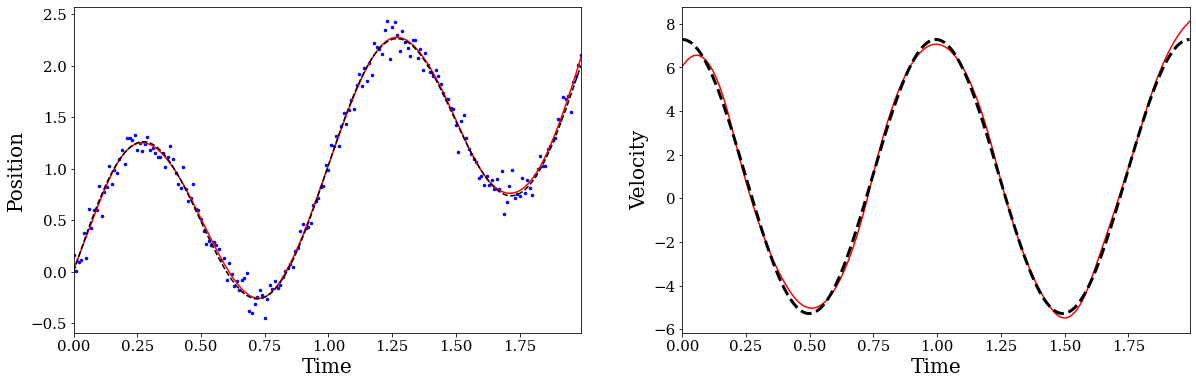

In [12]:
# x_hat, dxdt_hat = pynumdiff.finite_difference.first_order(x, dt)

# params = [20]
# x_hat, dxdt_hat = pynumdiff.smooth_finite_difference.gaussiandiff(x, dt, params, options={'iterate': False})

# params = [20]
# x_hat, dxdt_hat = pynumdiff.smooth_finite_difference.friedrichsdiff(x, dt, params, options={'iterate': False})

params = [20]
x_hat, dxdt_hat = pynumdiff.total_variation_regularization.jerk(x, dt, params)

evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

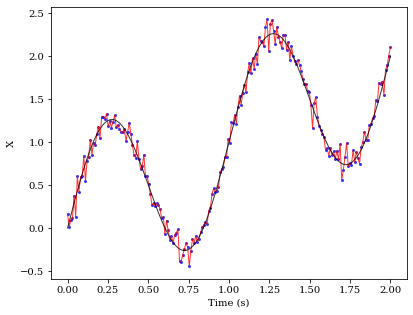

In [24]:
fig = plt.figure(figsize=(14,5))
ax = fig.add_subplot(121)
ax.plot(t, x,
        linestyle='none',
        color='blue', 
        marker='.',
        markerfacecolor='blue',
        markeredgecolor='none',
        markersize=6, alpha=0.8,
        linewidth=2)

ax.plot(t, x_hat,
        linestyle='-',
        color='red', 
        marker='',
        markerfacecolor='blue',
        markeredgecolor='none',
        markersize=6, alpha=0.8,
        linewidth=1)

ax.plot(t, x_truth,
        linestyle='-',
        color='black', 
        marker='',
        markerfacecolor='blue',
        markeredgecolor='none',
        markersize=6, alpha=0.8,
        linewidth=1)


# ax.plot(t, x_truth, '-',
#         color='black',
#         linewidth=4)

ax.set_xlabel('Time (s)')
ax.set_ylabel('X')
plt.show()

In [4]:
noise_type = 'normal'
noise_parameters = [0, 0.1]  # mean and std

# time step size and time series length in TIME
dt = 0.01
timeseries_length = 4
# simulate data

x, x_truth, dxdt_truth, _ = simulate.pi_control(dt=dt, timeseries_length=timeseries_length, 
                                                noise_type=noise_type, noise_parameters=noise_parameters)

RMS error in velocity:  6.820305856536254


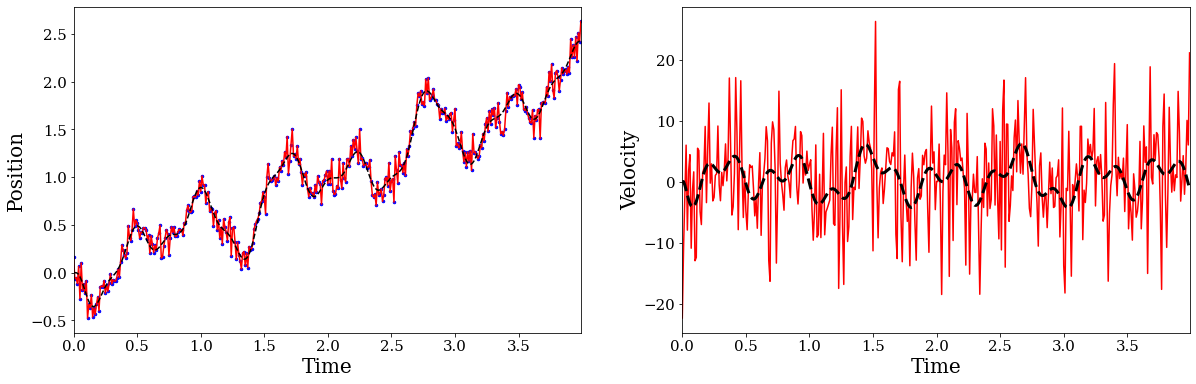

In [5]:
x_hat, dxdt_hat = pynumdiff.finite_difference.first_order(x, dt)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)